In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.losses import Huber
from keras.optimizers import Adam

In [6]:
df = pd.read_csv("Google_Stock_Price_Test.csv")

In [7]:
print(df.head())

       Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3  1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4  1/9/2017  806.40  809.97  802.83  806.65  1,272,400


In [8]:
df = df.set_index('Date')

In [17]:
closing_price = df['Close']

In [18]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_closing_price = scaler.fit_transform(closing_price.values.reshape(-1, 1))

In [19]:
# Split the data into training and testing sets
train_size = int(len(scaled_closing_price) * 0.8)
test_size = len(scaled_closing_price) - train_size

train_data = scaled_closing_price[:train_size]
test_data = scaled_closing_price[train_size:]

In [20]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(128, activation='tanh', input_shape=(1, 1)))
model.add(Dense(1))

In [29]:
model.compile(loss=Huber(), optimizer=Adam(learning_rate=0.001))

In [30]:
# Train the model
model.fit(train_data, train_data, epochs=100, batch_size=32)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.0083
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0080
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0077
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0074
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0071
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0068
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0065
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0063
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0060
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0057
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0055
Epoch 12/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0052
Epoch 13/100
1/1 [==============================] -

In [31]:
# Make predictions
predictions = model.predict(test_data)

1/1 [==============================] - 1s 627ms/step


In [32]:
# Inverse scale the predictions
predictions = scaler.inverse_transform(predictions)

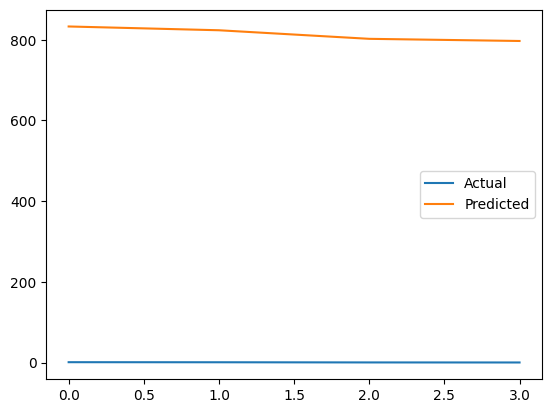

In [35]:
# Plot the predictions
plt.plot(test_data, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()